# Google Colab 한글 폰트 설치

In [1]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


- 테스트

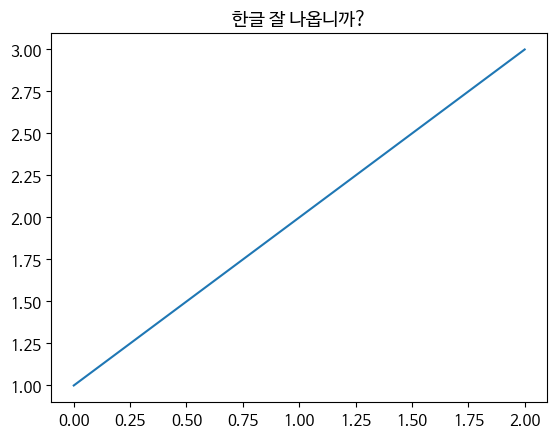

In [5]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# Google Colab과 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 독립성 검정 문제
- 주어진 데이터(dataset/student.csv)는 A 대학생의 학생 300명을 대상으로 각 학생이 속한 단과대학과 이번 학기 수강 과목 수를 조사한 결과이다. 이를 이용하여 단과대학별로 수강 과목 수에 차이가 있는지 카이제곱검정을 통해 답하고자 한다. 가설은 아래와 같다.
- 가설검정
    + 귀무가설 : 단과대별 수강 과목수는 독립적이다.
    + 대립가설 : not H0
- 문제 1: 주어진 데이터로 단과대학과 수강 과목 수로 분할표를 만들었을 때, 수강 과목 수가 '6개 이상'인 학생 수가 가장 많은 단과대학을 출력하시오.
- 문제 2: 위의 가설을 검정하기 위한 검정통계량을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 3: 위의 통계량에 대한 p-값을 구하고 (반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.  

In [125]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/student.csv")
df.head()

,ID,단과대학,수강 과목 수
0,1,경영대학,4개 이하
1,2,경영대학,4개 이하
2,3,경영대학,4개 이하
3,4,경영대학,4개 이하
4,5,경영대학,4개 이하


### 문제 1 코드

In [131]:
ct = pd.crosstab(df['단과대학'], df['수강 과목 수']); #print(ct)
max = ct.loc[ct['6개 이상'].idxmax()]
max

,경영대학
수강 과목 수,
4개 이하,12
5개,78
6개 이상,30


In [162]:
ct = pd.crosstab(df['단과대학'], df['수강 과목 수'])
res = ct[ct['6개 이상'] == ct['6개 이상'].max()]
print(res.index[0])
ct

경영대학


수강 과목 수,4개 이하,5개,6개 이상
단과대학,,,
경영대학,12,78,30
공과대학,30,42,28
자연대학,30,42,8


In [157]:
df2 = df.groupby(['단과대학', '수강 과목 수']).count()
df3 = df2.reset_index()
df4 = df3[df3['수강 과목 수'] == '6개 이상'].sort_values(by = ['ID'], ascending = False)
print(df4['단과대학'].iloc[0])
df4
#잘못 만든 코드! -> 필요 이상으로 복잡하다

경영대학


,단과대학,수강 과목 수,ID
2,경영대학,6개 이상,30
5,공과대학,6개 이상,28
8,자연대학,6개 이상,8


In [99]:
df2

ID
단과대학 수강 과목 수    
경영대학 4개 이하    12
     5개       78
     6개 이상    30
공과대학 4개 이하    30
     5개       42
     6개 이상    28
자연대학 4개 이하    30
     5개       42
     6개 이상     8

### 문제 2 코드

In [164]:
import scipy as sp
from scipy import stats

t, p, dof, expected = stats.chi2_contingency(ct)

t
#df2 를 씀 -> 잘못된 결과!! 왖넌한 도수분포표인 crosstab을 사용해야 한다.

30.127525252525256

### 문제 3 코드

In [165]:
print(p)

if p < 0.05:
    print("귀무가설 기각")
else:
    print("귀무가설 채택")

4.6103966676496775e-06
귀무가설 기각


## 적합도 검정
- 주어진 데이터(dataset/cellphone.csv)는 A회사의 직원 200명을 대상으로 현재 사용하고 있는 스마트폰 제조사를 조사한 결과이다. 최근 조사에 따르면, 스마트폰 제조사 점유율은 삼성 60%, 애플 30%, 기타 10%라고 한다. 이를 이용하여 A회사의 직원들이 사용하는 스마트폰 제조사 분포가 국내 스마트폰 제조사 점유율 분포와 동일한지 카이제곱검정을 통해 답하고자 한다.  
- 가설검정
    + 귀무가설 : 직원 사용 분포가 국내 점유율 분포를 따른다.
    + 대립가설 : not H0
- 문제 1: 삼성 제조사 스마트폰 사용 직원 수에서 애플 제조사 스마트폰 사용 직원 수를 뺀 값을 정수로 출력하시오.
- 문제 2: 문제에서 제시된 국내 스마트폰 제조사 점유율을 이용하여 기대 빈도를 계산하고, 위의 가설을 검정하기 위한 검정통계량을 구하시오. (반올림하여 소숫점 둘째 자리까지 계산)
- 문제 3: 위의 통계량에 대한 p-값을 구하고 (반올림하여 소숫점 넷째 자리까지 계산), 유의수준 0.05하에서 가설검정의 결과를 채택/기각 중 하나로 선택하시오.

In [102]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iM_alphaco/data_set/cellphone.csv")
df.head()

,id,제조사
0,1,삼성
1,2,애플
2,3,삼성
3,4,애플
4,5,애플


### 문제 1 코드

In [103]:
df['제조사'].value_counts(normalize = True)

,proportion
제조사,
삼성,0.585
애플,0.390
기타,0.025


In [104]:
x = df.groupby(['제조사']).count().reset_index()
res = x.loc[x['제조사'] == '삼성']['id'].item() - x.loc[x['제조사'] == '애플']['id'].item()
res

39

### 문제 2 코드

In [120]:
X = df.groupby(['제조사']).count()
X

,id
제조사,
기타,5
삼성,117
애플,78


In [115]:
s = len(df)
s_sam = int(s * 0.6)
s_app = int(s * 0.3)
s_etc = int(s * 0.1)

expected = [s_etc, s_sam, s_app]

print(expected)

[20, 120, 60]


In [123]:
t, p  = stats.chisquare(X['id'].values, f_exp = expected)

print(round(t,2))

16.73


### 문제 3 코드

In [109]:
print(p)

if p < 0.05:
    print("귀무가설 기각")
else:
    print("귀무가설 채택")

[8.77469531e-22]
귀무가설 기각
